## 导入数据 

In [1]:
import pandas as pd

In [2]:
import os
print("1111")
print (os.getcwd())#获得当前目录
print (os.path.abspath('.'))#获得当前工作目录
print (os.path.abspath('..'))#获得当前工作目录的父目录
print (os.path.abspath(os.curdir))#获得当前工作目录

1111
C:\Users\14284\Documents\numpy\Numpy-Pandas
C:\Users\14284\Documents\numpy\Numpy-Pandas
C:\Users\14284\Documents\numpy
C:\Users\14284\Documents\numpy\Numpy-Pandas


In [32]:
stations = pd.read_csv('./data/stations/stations.csv',encoding='utf-8')
stations.head()

,id,name,lat,long,docks,city
0,1.0,#San Jose Diridon Caltrain Station# ...,37.329732,-121.901782,27.0,San Jose
1,2.0,#San Jose Civic Center#,37.330698,-121.888979,15.0,San Jose
2,3.0,#Santa Clara at Almaden#,37.333988,-121.894902,11.0,San Jose
3,4.0,#Adobe on Almaden#,37.331415,-121.893200,19.0,San Jose
4,5.0,#San Pedro Square#,37.336721,-121.894074,15.0,San Jose


In [20]:
trips1 = pd.read_csv('./data/stations/trips1.csv',encoding='utf-8')
trips2 = pd.read_csv('./data/stations/trips2.csv',encoding='utf-8')
trips3 = pd.read_csv('./data/stations/trips3.csv',encoding='utf-8')
trips1.head()
# trips3 = pd.read_csv('./data/stations/trips3.csv',encoding='utf-8',name= [])

,start_id,end_id,start_date,end_date,subscription_type
0,55,55,8/29/2013 14:13,8/29/2013 14:14,Subscriber
1,9,9,8/29/2013 14:42,8/29/2013 14:43,Subscriber
2,21,21,8/29/2013 10:16,8/29/2013 10:17,Subscriber
3,9,9,8/29/2013 11:29,8/29/2013 11:30,Subscriber
4,55,56,8/29/2013 12:02,8/29/2013 12:04,Subscriber


## 合并数据 

In [21]:
trips=pd.concat([trips1,trips2,trips3],axis = 0) # axis = 0列对齐，增加行
trips.shape

(2102, 5)

In [22]:
print(trips1.shape)
print(trips2.shape)
print(trips3.shape)

(700, 5)
(700, 5)
(702, 5)


In [31]:
stations.head()

,start_name,start_lat,start_long,start_docks,start_city
start_id,,,,,
1.0,#San Jose Diridon Caltrain Station# ...,37.329732,-121.901782,27.0,San Jose
2.0,#San Jose Civic Center#,37.330698,-121.888979,15.0,San Jose
3.0,#Santa Clara at Almaden#,37.333988,-121.894902,11.0,San Jose
4.0,#Adobe on Almaden#,37.331415,-121.893200,19.0,San Jose
5.0,#San Pedro Square#,37.336721,-121.894074,15.0,San Jose


将stations中所有列名称前添加字段'start_'，并将start_id 设为列索引

In [33]:
stations.columns = stations.columns.map(lambda x: 'start_' +x)

In [34]:
stations.head()

,start_id,start_name,start_lat,start_long,start_docks,start_city
0,1.0,#San Jose Diridon Caltrain Station# ...,37.329732,-121.901782,27.0,San Jose
1,2.0,#San Jose Civic Center#,37.330698,-121.888979,15.0,San Jose
2,3.0,#Santa Clara at Almaden#,37.333988,-121.894902,11.0,San Jose
3,4.0,#Adobe on Almaden#,37.331415,-121.893200,19.0,San Jose
4,5.0,#San Pedro Square#,37.336721,-121.894074,15.0,San Jose


In [35]:
stations.set_index(['start_id'],inplace = True)

In [36]:
stations.head()

,start_name,start_lat,start_long,start_docks,start_city
start_id,,,,,
1.0,#San Jose Diridon Caltrain Station# ...,37.329732,-121.901782,27.0,San Jose
2.0,#San Jose Civic Center#,37.330698,-121.888979,15.0,San Jose
3.0,#Santa Clara at Almaden#,37.333988,-121.894902,11.0,San Jose
4.0,#Adobe on Almaden#,37.331415,-121.893200,19.0,San Jose
5.0,#San Pedro Square#,37.336721,-121.894074,15.0,San Jose


将trips和stations按照start_id进行字段匹配并合并，保留所有匹配成功的信息

In [37]:
trips_stations = pd.merge(trips, stations , left_on= 'start_id', right_on = 'start_id',
                         how = 'outer', right_index  = True)

In [38]:
trips_stations.head()

,start_id,end_id,start_date,end_date,subscription_type,start_name,start_lat,start_long,start_docks,start_city
0,55,55.0,8/29/2013 14:13,8/29/2013 14:14,Subscriber,#South Van Ness at Market#,37.774814,-122.418954,19.0,San Francisco
4,55,56.0,8/29/2013 12:02,8/29/2013 12:04,Subscriber,#South Van Ness at Market#,37.774814,-122.418954,19.0,San Francisco
8,55,55.0,8/29/2013 17:01,8/29/2013 17:03,Subscriber,#South Van Ness at Market#,37.774814,-122.418954,19.0,San Francisco
28,55,55.0,8/29/2013 21:43,8/29/2013 21:46,Subscriber,#South Van Ness at Market#,37.774814,-122.418954,19.0,San Francisco
60,55,56.0,8/29/2013 17:05,8/29/2013 17:08,Subscriber,#South Van Ness at Market#,37.774814,-122.418954,19.0,San Francisco


## 导出数据 

In [40]:
trips_stations.to_csv('./data/trips_stations.csv')

## 去除重复值 

查看是否包含重复值

In [42]:
trips_stations_dup = trips_stations.duplicated() #一行每一个元素都重复

In [44]:
# trips_stations[trips_stations_dup]
trips_stations = trips_stations.drop_duplicates()

In [46]:
trips_stations_dup = trips_stations.duplicated() #一行每一个元素都重复
trips_stations[trips_stations_dup]

,start_id,end_id,start_date,end_date,subscription_type,start_name,start_lat,start_long,start_docks,start_city


## 处理缺失值 

In [54]:
isNa_trips_stations = trips_stations.isnull()
trips_stations[isNa_trips_stations.any(axis=1)]

,start_id,end_id,start_date,end_date,subscription_type,start_name,start_lat,start_long,start_docks,start_city
282,59,54.0,NaN,NaN,Customer,#San Francisco Caltrain (Townsend at ...,37.776617,-122.395260,19.0,San Francisco
692,40,40.0,NaN,NaN,Customer,#Harry Bridges Plaza (Ferry Building)...,37.795392,-122.394203,23.0,San Francisco
74,54,59.0,8/29/2013 23:12,8/29/2013 23:16,Customer,#Townsend at 7th#,NaN,NaN,15.0,San Francisco
95,54,58.0,8/29/2013 19:18,8/29/2013 19:23,Customer,#Townsend at 7th#,NaN,NaN,15.0,San Francisco
138,54,59.0,8/29/2013 16:37,8/29/2013 16:43,Subscriber,#Townsend at 7th#,NaN,NaN,15.0,San Francisco
143,54,59.0,8/29/2013 16:05,8/29/2013 16:11,Customer,#Townsend at 7th#,NaN,NaN,15.0,San Francisco
148,54,59.0,8/29/2013 13:19,8/29/2013 13:25,Subscriber,#Townsend at 7th#,NaN,NaN,15.0,San Francisco
247,54,53.0,8/29/2013 12:46,8/29/2013 12:54,Subscriber,#Townsend at 7th#,NaN,NaN,15.0,San Francisco
268,54,59.0,8/29/2013 16:01,8/29/2013 16:11,Customer,#Townsend at 7th#,NaN,NaN,15.0,San Francisco
320,54,58.0,8/29/2013 17:12,8/29/2013 17:23,Subscriber,#Townsend at 7th#,NaN,NaN,15.0,San Francisco


向上填充法

每一个NaN都使用它上方的存在值作为填充值

In [50]:
trips_stations['start_docks'].ffill()

0      19.0
4      19.0
8      19.0
28     19.0
60     19.0
63     19.0
79     19.0
130    19.0
170    19.0
199    19.0
284    19.0
303    19.0
306    19.0
324    19.0
325    19.0
333    19.0
338    19.0
398    19.0
411    19.0
439    19.0
456    19.0
457    19.0
470    19.0
471    19.0
473    19.0
480    19.0
488    19.0
511    19.0
514    19.0
541    19.0
       ... 
553    19.0
510    19.0
624    19.0
330    19.0
77     19.0
690    15.0
5      15.0
194    15.0
76     15.0
102    15.0
205    15.0
555    15.0
648    15.0
118    15.0
371    15.0
427    15.0
496    15.0
221    15.0
145    15.0
302    15.0
334    15.0
351    15.0
696    15.0
86     15.0
701    15.0
701    11.0
701    15.0
701    15.0
701    15.0
701    15.0
Name: start_docks, Length: 1936, dtype: float64

向下填充法

In [51]:
trips_stations['start_docks'].bfill()

0      19.0
4      19.0
8      19.0
28     19.0
60     19.0
63     19.0
79     19.0
130    19.0
170    19.0
199    19.0
284    19.0
303    19.0
306    19.0
324    19.0
325    19.0
333    19.0
338    19.0
398    19.0
411    19.0
439    19.0
456    19.0
457    19.0
470    19.0
471    19.0
473    19.0
480    19.0
488    19.0
511    19.0
514    19.0
541    19.0
       ... 
553    19.0
510    19.0
624    19.0
330    19.0
77     19.0
690    15.0
5      15.0
194    15.0
76     15.0
102    15.0
205    15.0
555    15.0
648    15.0
118    15.0
371    15.0
427    15.0
496    15.0
221    15.0
145    15.0
302    15.0
334    15.0
351    15.0
696    15.0
86     15.0
701    15.0
701    11.0
701    15.0
701    15.0
701    15.0
701    15.0
Name: start_docks, Length: 1936, dtype: float64

中位数填充法

In [52]:
docks_median = trips_stations['start_docks'].median()
trips_stations['start_docks'].fillna(docks_median)

0      19.0
4      19.0
8      19.0
28     19.0
60     19.0
63     19.0
79     19.0
130    19.0
170    19.0
199    19.0
284    19.0
303    19.0
306    19.0
324    19.0
325    19.0
333    19.0
338    19.0
398    19.0
411    19.0
439    19.0
456    19.0
457    19.0
470    19.0
471    19.0
473    19.0
480    19.0
488    19.0
511    19.0
514    19.0
541    19.0
       ... 
553    19.0
510    19.0
624    19.0
330    19.0
77     19.0
690    15.0
5      15.0
194    15.0
76     15.0
102    15.0
205    15.0
555    15.0
648    15.0
118    15.0
371    15.0
427    15.0
496    15.0
221    15.0
145    15.0
302    15.0
334    15.0
351    15.0
696    15.0
86     15.0
701    15.0
701    11.0
701    15.0
701    15.0
701    15.0
701    15.0
Name: start_docks, Length: 1936, dtype: float64

In [53]:
trips_stations['start_docks'] = trips_stations['start_docks'].fillna(docks_median)

删除缺失值

In [56]:
trips_stations.dropna()

,start_id,end_id,start_date,end_date,subscription_type,start_name,start_lat,start_long,start_docks,start_city
0,55,55.0,8/29/2013 14:13,8/29/2013 14:14,Subscriber,#South Van Ness at Market#,37.774814,-122.418954,19.0,San Francisco
4,55,56.0,8/29/2013 12:02,8/29/2013 12:04,Subscriber,#South Van Ness at Market#,37.774814,-122.418954,19.0,San Francisco
8,55,55.0,8/29/2013 17:01,8/29/2013 17:03,Subscriber,#South Van Ness at Market#,37.774814,-122.418954,19.0,San Francisco
28,55,55.0,8/29/2013 21:43,8/29/2013 21:46,Subscriber,#South Van Ness at Market#,37.774814,-122.418954,19.0,San Francisco
60,55,56.0,8/29/2013 17:05,8/29/2013 17:08,Subscriber,#South Van Ness at Market#,37.774814,-122.418954,19.0,San Francisco
63,55,47.0,8/29/2013 13:58,8/29/2013 14:02,Subscriber,#South Van Ness at Market#,37.774814,-122.418954,19.0,San Francisco
79,55,55.0,8/29/2013 14:17,8/29/2013 14:21,Subscriber,#South Van Ness at Market#,37.774814,-122.418954,19.0,San Francisco
130,55,61.0,8/29/2013 21:47,8/29/2013 21:52,Subscriber,#South Van Ness at Market#,37.774814,-122.418954,19.0,San Francisco
170,55,56.0,8/29/2013 19:41,8/29/2013 19:47,Subscriber,#South Van Ness at Market#,37.774814,-122.418954,19.0,San Francisco
199,55,42.0,8/29/2013 13:05,8/29/2013 13:12,Subscriber,#South Van Ness at Market#,37.774814,-122.418954,19.0,San Francisco


In [57]:
isNa_trips_stations = trips_stations.isnull()
trips_stations[isNa_trips_stations.any(axis=1)]

,start_id,end_id,start_date,end_date,subscription_type,start_name,start_lat,start_long,start_docks,start_city
282,59,54.0,NaN,NaN,Customer,#San Francisco Caltrain (Townsend at ...,37.776617,-122.395260,19.0,San Francisco
692,40,40.0,NaN,NaN,Customer,#Harry Bridges Plaza (Ferry Building)...,37.795392,-122.394203,23.0,San Francisco
74,54,59.0,8/29/2013 23:12,8/29/2013 23:16,Customer,#Townsend at 7th#,NaN,NaN,15.0,San Francisco
95,54,58.0,8/29/2013 19:18,8/29/2013 19:23,Customer,#Townsend at 7th#,NaN,NaN,15.0,San Francisco
138,54,59.0,8/29/2013 16:37,8/29/2013 16:43,Subscriber,#Townsend at 7th#,NaN,NaN,15.0,San Francisco
143,54,59.0,8/29/2013 16:05,8/29/2013 16:11,Customer,#Townsend at 7th#,NaN,NaN,15.0,San Francisco
148,54,59.0,8/29/2013 13:19,8/29/2013 13:25,Subscriber,#Townsend at 7th#,NaN,NaN,15.0,San Francisco
247,54,53.0,8/29/2013 12:46,8/29/2013 12:54,Subscriber,#Townsend at 7th#,NaN,NaN,15.0,San Francisco
268,54,59.0,8/29/2013 16:01,8/29/2013 16:11,Customer,#Townsend at 7th#,NaN,NaN,15.0,San Francisco
320,54,58.0,8/29/2013 17:12,8/29/2013 17:23,Subscriber,#Townsend at 7th#,NaN,NaN,15.0,San Francisco


## 处理空格值 

去除start_name列中每个字符串左右两边的空格和#

In [59]:
trips_stations['start_name'].head()

0              #South Van Ness at Market#         
4              #South Van Ness at Market#         
8              #South Van Ness at Market#         
28             #South Van Ness at Market#         
60             #South Van Ness at Market#         
Name: start_name, dtype: object

In [60]:
trips_stations['start_name'] = trips_stations['start_name'].str.strip()
# trips_stations['start_name'].str.lstrip() #删左边空格
# trips_stations['start_name'].str.rstrip() #删右边空格

In [61]:
trips_stations['start_name'].head()

0     #South Van Ness at Market#
4     #South Van Ness at Market#
8     #South Van Ness at Market#
28    #South Van Ness at Market#
60    #South Van Ness at Market#
Name: start_name, dtype: object

In [62]:
trips_stations['start_name'] = trips_stations['start_name'].str.strip('#')

In [63]:
trips_stations['start_name'].head()

0     South Van Ness at Market
4     South Van Ness at Market
8     South Van Ness at Market
28    South Van Ness at Market
60    South Van Ness at Market
Name: start_name, dtype: object

## 字段拆分 

将start_date和end_date中的日期和时间进行拆分，并分别记录在start_date,start_time,end_date,end_time

In [88]:
trips_stations.head()

,start_id,end_id,start_date,start_time,end_date,end_time,subscription_type,start_name,start_lat,start_long,start_docks,start_city
0,55,55.0,8/29/2013,14:13,8/29/2013,14:14,Subscriber,South Van Ness at Market,37.774814,-122.418954,19.0,San Francisco
4,55,56.0,8/29/2013,12:02,8/29/2013,12:04,Subscriber,South Van Ness at Market,37.774814,-122.418954,19.0,San Francisco
8,55,55.0,8/29/2013,17:01,8/29/2013,17:03,Subscriber,South Van Ness at Market,37.774814,-122.418954,19.0,San Francisco
28,55,55.0,8/29/2013,21:43,8/29/2013,21:46,Subscriber,South Van Ness at Market,37.774814,-122.418954,19.0,San Francisco
60,55,56.0,8/29/2013,17:05,8/29/2013,17:08,Subscriber,South Van Ness at Market,37.774814,-122.418954,19.0,San Francisco


In [66]:
new_col = trips_stations['start_date'].str.split(' ',1 ,True)
# 第二个参数为分割次数
# True表示拆分后结果为dataframe,Flase表示Series

In [67]:
new_col.head()

,0,1
0,8/29/2013,14:13
4,8/29/2013,12:02
8,8/29/2013,17:01
28,8/29/2013,21:43
60,8/29/2013,17:05


In [68]:
new_col.columns = ['start_date','start_time']

In [69]:
trips_stations['start_date'] = new_col['start_date']

In [71]:
trips_stations.insert(loc = 3,column = 'start_time', value = new_col['start_time'])
# 增加一列start_time

In [73]:
new_col = trips_stations['end_date'].str.split(' ',1 ,True)
new_col.columns = ['end_date','end_time']
trips_stations['end_date'] = new_col['end_date']
trips_stations.insert(loc = 5,column = 'end_time', value = new_col['end_time'])

## 数据分组 

将每个车站数进行分组，分为几类

在start_docks列右侧增加一列start_docks_classification记录每个车站所属的分类

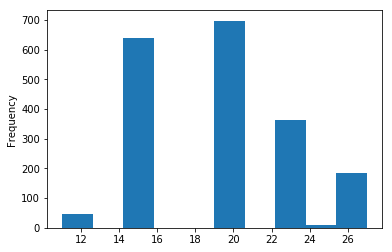

In [90]:
trips_stations['start_docks'].plot.hist()

In [91]:
trips_stations['start_docks'].describe()

count    1936.000000
mean       19.028926
std         4.007124
min        11.000000
25%        15.000000
50%        19.000000
75%        23.000000
max        27.000000
Name: start_docks, dtype: float64

In [92]:
bins = [min(trips_stations['start_docks'])-1,13,15,17,19,21,23,25,
       max(trips_stations['start_docks'])+1]

In [114]:
labels = ['13以下','13到15','15到17','17到19','19到21','21到23','23到25','23以上']
cut = pd.cut(trips_stations['start_docks'], bins, right = False,labels = labels) #right = False左闭右开
cut.head()

0     19到21
4     19到21
8     19到21
28    19到21
60    19到21
Name: start_docks, dtype: category
Categories (8, object): [13以下 < 13到15 < 15到17 < 17到19 < 19到21 < 21到23 < 23到25 < 23以上]

In [124]:
trips_stations.head()

,start_id,end_id,start_date,start_time,end_date,end_time,subscription_type,start_name,start_lat,start_long,start_docks,start_docks_classification,start_city
0,55,55.0,8/29/2013,14:13,8/29/2013,14:14,Subscriber,South Van Ness at Market,37.774814,-122.418954,19.0,19到21,San Francisco
4,55,56.0,8/29/2013,12:02,8/29/2013,12:04,Subscriber,South Van Ness at Market,37.774814,-122.418954,19.0,19到21,San Francisco
8,55,55.0,8/29/2013,17:01,8/29/2013,17:03,Subscriber,South Van Ness at Market,37.774814,-122.418954,19.0,19到21,San Francisco
28,55,55.0,8/29/2013,21:43,8/29/2013,21:46,Subscriber,South Van Ness at Market,37.774814,-122.418954,19.0,19到21,San Francisco
60,55,56.0,8/29/2013,17:05,8/29/2013,17:08,Subscriber,South Van Ness at Market,37.774814,-122.418954,19.0,19到21,San Francisco


In [116]:

col_name = trips_stations.columns.tolist() # 列名原本为index类型，无法提取索引
trips_stations.insert(loc = col_name.index('start_docks')+1,
                     column = 'start_docks_classification',
                     value = cut)

In [112]:
# trips_stations = trips_stations.drop('start_docks_classification',axis = 1)

## 添加虚拟变量 

将subscription_type转化为虚拟变量，添加到最后一列

In [129]:
# trips_stations['subscription_type']
trips_stations_dummies =  pd.get_dummies(trips_stations, columns = ['subscription_type'],
               prefix = ['subscription_type'], prefix_sep = '_')


In [130]:
trips_stations_dummies['subscription_type'] = trips_stations['subscription_type']

In [131]:
trips_stations_dummies.head()

,start_id,end_id,start_date,start_time,end_date,end_time,start_name,start_lat,start_long,start_docks,start_docks_classification,start_city,subscription_type_Customer,subscription_type_Subscriber,subscription_type
0,55,55.0,8/29/2013,14:13,8/29/2013,14:14,South Van Ness at Market,37.774814,-122.418954,19.0,19到21,San Francisco,0,1,Subscriber
4,55,56.0,8/29/2013,12:02,8/29/2013,12:04,South Van Ness at Market,37.774814,-122.418954,19.0,19到21,San Francisco,0,1,Subscriber
8,55,55.0,8/29/2013,17:01,8/29/2013,17:03,South Van Ness at Market,37.774814,-122.418954,19.0,19到21,San Francisco,0,1,Subscriber
28,55,55.0,8/29/2013,21:43,8/29/2013,21:46,South Van Ness at Market,37.774814,-122.418954,19.0,19到21,San Francisco,0,1,Subscriber
60,55,56.0,8/29/2013,17:05,8/29/2013,17:08,South Van Ness at Market,37.774814,-122.418954,19.0,19到21,San Francisco,0,1,Subscriber
